In [48]:
# Import random shit
import numpy as np
import matplotlib.pyplot as plt

# Get that yum yum sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

%matplotlib inline

In [2]:
# Load our data and shit
train_data = np.loadtxt('./training_data.txt', skiprows=1, delimiter=' ')
test_data = np.loadtxt('./test_data.txt', skiprows=1, delimiter=' ')

In [51]:
# Split training and test set into x and y
scaler = StandardScaler()
x_train = scaler.fit_transform(train_data[:, 1:])
y_train = train_data[:, 0]

x_test = scaler.transform(test_data)

In [38]:
# Try a random forest classifier
n_estimators = 1000
clf = RandomForestClassifier(n_estimators = n_estimators, min_samples_leaf=100, n_jobs=-1, criterion = 'gini')

clf.fit(x_train, y_train)

y_test = clf.predict(x_test)

In [28]:
def convert(y_test, filename):
    """
    Converts the y_test vector to submission file and saves to filename
    
    Inputs:
        y_test: A (N, ) array with the predicted results for the test set
        filename: String name of file
        
    Outputs:
        None
    """
    
    text_file = np.array([[i+1, int(y_test[i])] for i in range(len(y_test))])
    np.savetxt(filename, text_file, fmt='%d', delimiter=',')
    
    f = open(filename,'r+')
    lines = f.readlines() # read old content
    f.seek(0) # go back to the beginning of the file
    f.write('Id,Prediction\n') # write new content at the beginning
    for line in lines: # write old content after new
        f.write(line)
    f.close()

In [39]:
convert(y_test, 'sub3.txt')

In [73]:
# Try AdaBoost
depths = np.arange(1, 5)
errors = np.empty((len(depths), 3))
tree_clf = tree.DecisionTreeClassifier()
clf = AdaBoostClassifier(base_estimator=tree_clf, n_estimators=100)
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for ind, max_depth in enumerate(depths):
    print('Max depth of base estimator: {0:d}'.format(max_depth))
    tree_clf.set_params(max_depth=max_depth)
    clf.set_params(base_estimator=tree_clf)
    learn_errs = []
    for learning_rate in [1, 0.95, 0.8]:
        print('Learning rate: {0:.2f}'.format(learning_rate))
        clf.set_params(learning_rate=learning_rate)
        learn_errs.append(np.mean(cross_val_score(clf, x_train, y_train, cv=ss)))
    errors[ind] = learn_errs

Max depth of base estimator: 1
Learning rate: 1.00
Learning rate: 0.95
Learning rate: 0.80
Max depth of base estimator: 2
Learning rate: 1.00
Learning rate: 0.95
Learning rate: 0.80
Max depth of base estimator: 3
Learning rate: 1.00
Learning rate: 0.95
Learning rate: 0.80
Max depth of base estimator: 4
Learning rate: 1.00
Learning rate: 0.95
Learning rate: 0.80


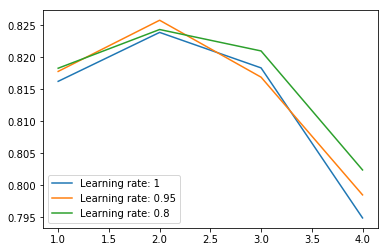

In [74]:
plt.figure()
plt.plot(depths, errors[:, 0], label='Learning rate: 1')
plt.plot(depths, errors[:, 1], label='Learning rate: 0.95')
plt.plot(depths, errors[:, 2], label='Learning rate: 0.8')
plt.legend()

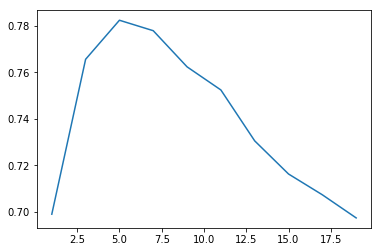

In [47]:
plt.figure()
plt.plot(depths, errors)

In [75]:
# Now use our best performing model to predict y
tree_clf = tree.DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(base_estimator=tree_clf, n_estimators=1000, learning_rate=0.95)

clf.fit(x_train, y_train)
y_test = clf.predict(x_test)

In [76]:
clf.score(x_train, y_train)

0.96220000000000006

In [55]:
y_test

array([ 1.,  1.,  0., ...,  0.,  1.,  0.])

In [78]:
convert(y_test, 'AdaBoost_depth2.txt')

In [60]:
convert(clf.predict(x_train), 'AdaBoost_train.txt')